<a href="https://colab.research.google.com/github/trista-paul/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/module2-choose-appropriate-visualizations/LS_DS_222_Choose_appropriate_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_
# Choose appropriate visualizations

Objectives
- fix misleading visualizations
- use Seaborn to visualize distributions and relationships with continuous and discrete variables

Links
- [How to Spot Visualization Lies](https://flowingdata.com/2017/02/09/how-to-spot-visualization-lies/)
- [Financial Times Visual Vocabulary poster](http://ft.com/vocabulary)
- [Choosing a Python Visualization Tool flowchart](http://pbpython.com/python-vis-flowchart.html)
- [Searborn example gallery](http://seaborn.pydata.org/examples/index.html) & [tutorial](http://seaborn.pydata.org/tutorial.html)


# Upgrade Seaborn

Make sure you have at least version 0.9.0.

On Colab, go to **Restart runtime** after you run the `pip` command.

In [1]:
!pip install --upgrade seaborn

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [2]:
import seaborn as sns
sns.__version__

'0.9.0'

# Fix misleading visualizations

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [4]:
!wget https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
    
import misleading

--2019-01-22 17:12:38--  https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/misleading.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1258 (1.2K) [text/plain]
Saving to: ‘misleading.py.1’

misleading.py.1     100%[===================>]   1.23K  --.-KB/s    in 0s      

2019-01-22 17:12:38 (235 MB/s) - ‘misleading.py.1’ saved [1258/1258]



### Fix misleading plot #1

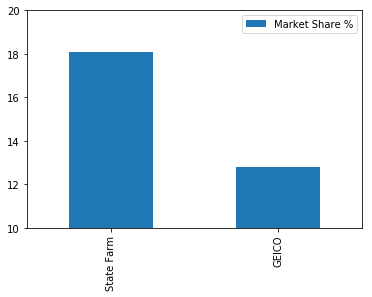

In [5]:
misleading.plot1();
#truncated y axis

In [0]:
misleading??
#source code of misleading.py

Text(0.5, 1.0, 'market share for auto insurance in the US')

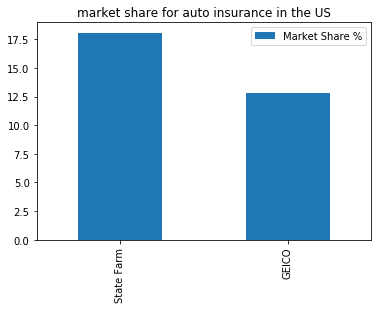

In [17]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO'], 
    data={'Market Share %': [18.07, 12.79]})


def plot1():
    return insurance.plot.bar() #delete ylim setting

insurance.plot.bar();
plt.title('market share for auto insurance in the US')
#these y truncations are unlikely to be accidental because you need to have done extra work to set the ylim

### Fix misleading plot #2

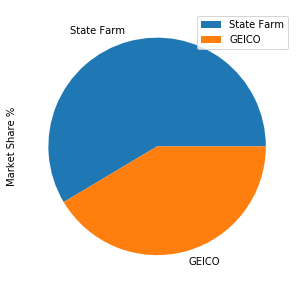

In [6]:
misleading.plot2();
#state farm + GEICO != 100%

In [22]:
insurance

,Market Share %
State Farm,18.07
GEICO,12.79


In [24]:
insurance = pd.DataFrame(
    index=['State Farm', 'GEICO', 'Other'], 
    data={'Market Share %': [18.07, 12.79, 100-18.07-12.79]})
insurance

,Market Share %
State Farm,18.07
GEICO,12.79
Other,69.14


Text(0.5, 1.0, 'market share for auto insurance in the US')

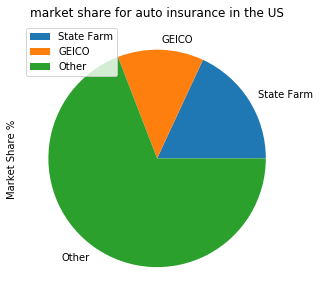

In [26]:
insurance.plot.pie('Market Share %', figsize=(5, 5))
plt.title('market share for auto insurance in the US')

## Fix misleading plot #3

_If you're on Jupyter (not Colab) then uncomment and run this cell below:_

In [0]:
#import altair as alt
#alt.renderers.enable('notebook')

In [0]:
misleading.plot3()
#plot of number of policies by state
#basically a population map
#easily accidental

In [0]:
#Load the State Farm data
# Based on https://altair-viz.github.io/gallery/choropleth_repeat.html
import altair as alt
from vega_datasets import data

url = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-1-Sprint-3-Data-Storytelling/master/module2-choose-appropriate-visualizations/direct_written_premium_by_state_by_group_private_passenger_auto.csv'

In [0]:
#Calculate Market Share Percentage by State
df = pd.read_csv(url)
df.rename(columns={'STATE FARM GRP': 'State Farm policy premiums'}, inplace=True)
variable = 'State Farm policy premiums'
#df.state farm policy premiums = revenue per state
#df.STATE TOTAL = pop of state
df

In [33]:
df['State Farm market share%'] = (
  df['State Farm policy premiums']/
  df['STATE TOTAL'])
df.head()

,state,id,State Farm policy premiums,BERKSHIRE HATHAWAY GRP,STATE TOTAL,State Farm market share%
0,Alabama,1,768213,282947,3025561,0.253908
1,Alaska,2,128613,81366,454623,0.282900
2,Arizona,4,760003,604049,4373055,0.173792
3,Arkansas,5,454931,96908,1777917,0.255879
4,California,6,3655463,2091720,25255501,0.144739


In [0]:
variable = 'State Farm market share %'
states = alt.topo_feature(data.us_10m.url, 'states')

alt.Chart(states).mark_geoshape().encode(
  alt.Color(variable, type='quantitative')
  ).transform_lookup(
  lookup='id',
  from_=alt.LookupData(df, 'id', [variable])
  ).properties(
  width=500,
  height=300
  ).project(
  type='albersUsa'
  )
#now IL, Louisiana are the highest % states

# Use Seaborn to visualize distributions and relationships with continuous and discrete variables

## 1. Anscombe dataset

### Load dataset

In [0]:
df = sns.load_dataset('anscombe')

### See the data's shape

In [36]:
df.shape

(44, 3)

### See the data

In [37]:
df.head

<bound method NDFrame.head of    dataset     x      y
0        I  10.0   8.04
1        I   8.0   6.95
2        I  13.0   7.58
3        I   9.0   8.81
4        I  11.0   8.33
5        I  14.0   9.96
6        I   6.0   7.24
7        I   4.0   4.26
8        I  12.0  10.84
9        I   7.0   4.82
10       I   5.0   5.68
11      II  10.0   9.14
12      II   8.0   8.14
13      II  13.0   8.74
14      II   9.0   8.77
15      II  11.0   9.26
16      II  14.0   8.10
17      II   6.0   6.13
18      II   4.0   3.10
19      II  12.0   9.13
20      II   7.0   7.26
21      II   5.0   4.74
22     III  10.0   7.46
23     III   8.0   6.77
24     III  13.0  12.74
25     III   9.0   7.11
26     III  11.0   7.81
27     III  14.0   8.84
28     III   6.0   6.08
29     III   4.0   5.39
30     III  12.0   8.15
31     III   7.0   6.42
32     III   5.0   5.73
33      IV   8.0   6.58
34      IV   8.0   5.76
35      IV   8.0   7.71
36      IV   8.0   8.84
37      IV   8.0   8.47
38      IV   8.0   7.04
39      IV

### [Group by](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) `'dataset'`

In [0]:
df = df.groupby(df.dataset)

### [Describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html) the groups

In [46]:
df.describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

### Get the [count](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html), for each column in each group

In [41]:
df.count()

,x,y
dataset,,
I,11,11
II,11,11
III,11,11
IV,11,11


### Get the [mean](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html) ...

In [42]:
df.mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


### Get the [standard deviation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html) ...

In [47]:
df.std()

,x,y
dataset,,
I,3.316625,2.031568
II,3.316625,2.031657
III,3.316625,2.030424
IV,3.316625,2.030579


### Get the [correlation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) ...

In [44]:
df.corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

### Use pandas to [plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) the groups, as scatter plots

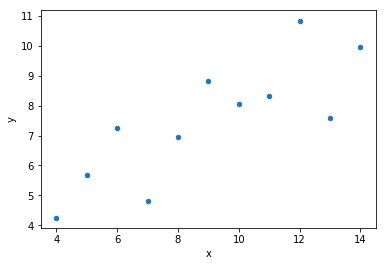

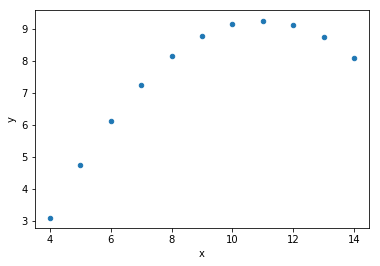

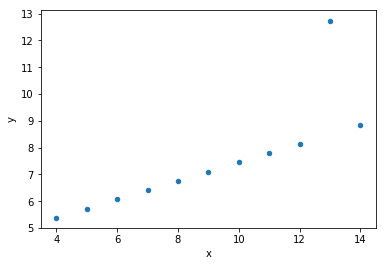

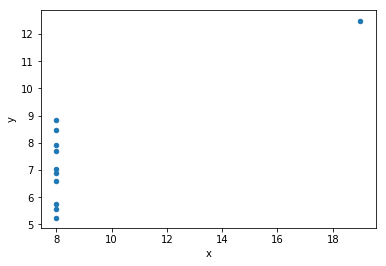

In [55]:
scatter = df.plot('x', 'y', kind='scatter');
scatter;

### Use Seaborn to make [relational plots](http://seaborn.pydata.org/generated/seaborn.relplot.html)

In [0]:
sns.relplot('x', 'y', col='dataset', data=df, col_wrap=2);

### Use Seaborn to make [linear model plots](http://seaborn.pydata.org/generated/seaborn.lmplot.html)

In [0]:
sns.lmplot('x', 'y', data=df, col='dataset', ci=None, hue='dataset');

#### Links
- [Seaborn examples: Anscombe's quartet](http://seaborn.pydata.org/examples/anscombes_quartet.html)
- [Wikipedia: Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)
- [The Datasaurus Dozen](https://www.autodeskresearch.com/publications/samestats)

## 2. Tips dataset

### Load dataset

In [0]:
tips = sns.load_dataset('tips')

### See the data's shape

In [64]:
tips.shape

(244, 7)

### See the first 5 rows

In [65]:
tips.head(5)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Describe the data

In [66]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [67]:
tips.describe(exclude=np.number)

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


### Make univariate [distribution plots](https://seaborn.pydata.org/generated/seaborn.distplot.html)

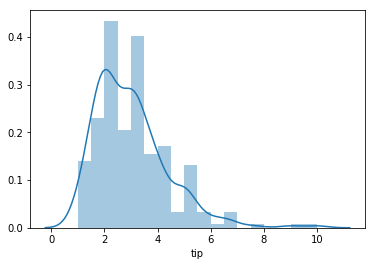

In [68]:
sns.distplot(tips.tip);

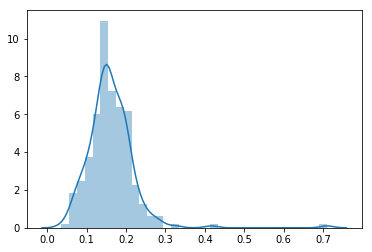

In [73]:
tips['percent'] = tips.tip/tips.total_bill
sns.distplot(tips.percent);

### Make bivariate [relational plots](https://seaborn.pydata.org/generated/seaborn.relplot.html)

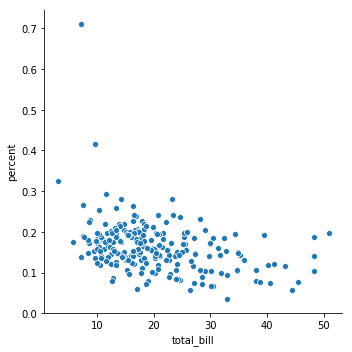

In [74]:
sns.relplot(x='total_bill', y='percent', data=tips);

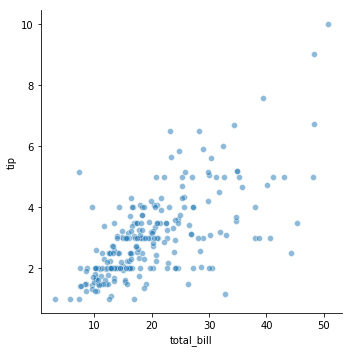

In [75]:
x='total_bill'
y='tip'
sns.relplot(x,y,data=tips, alpha=0.5);

### Make univariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

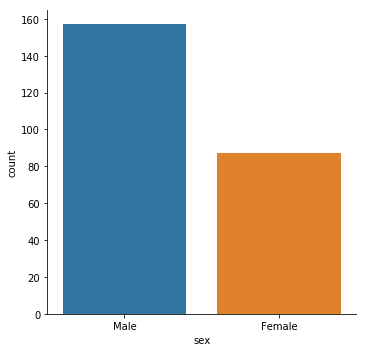

In [77]:
sns.catplot('sex', data=tips, kind='count');

In [0]:
sns.catplot()

### Make bivariate [categorical plots](https://seaborn.pydata.org/generated/seaborn.catplot.html)

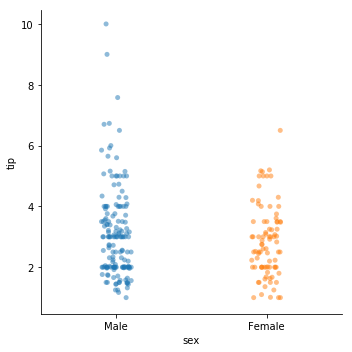

In [78]:
sns.catplot(x='sex',y='tip', data=tips, kind='strip', alpha=0.5);

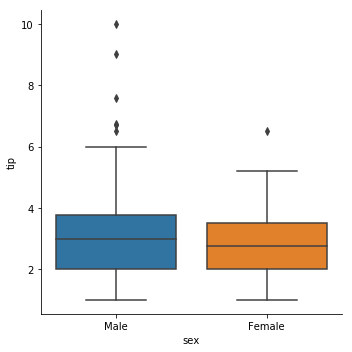

In [79]:
sns.catplot(x='sex',y='tip', data=tips, kind='box');

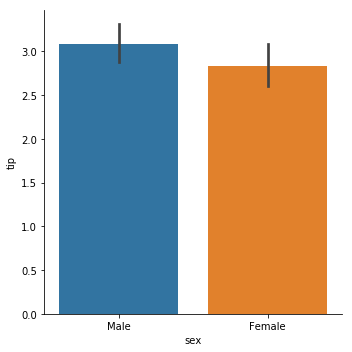

In [80]:
sns.catplot(x='sex',y='tip', data=tips, kind='bar');
#overlapping error bar in this plot reveals we aren't certain that males tip more

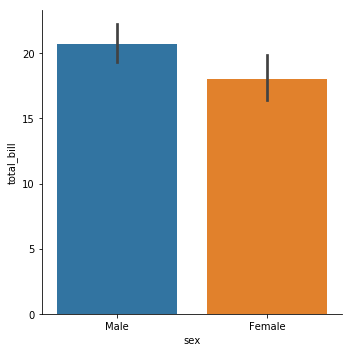

In [86]:
sns.catplot(x='sex',y='total_bill', data=tips, kind='bar');
#males may tip more because they have a higher bill, but not proportionally

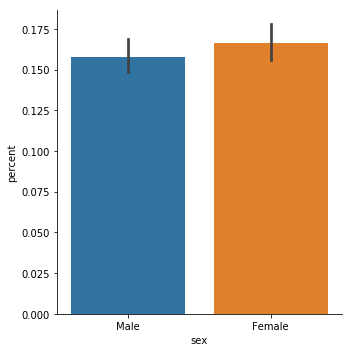

In [87]:
sns.catplot(x='sex',y='percent', data=tips, kind='bar');
#sex and % tipped; heavy error bar overlap.
#after all these visualizations we cannot make a conclusion on what
#sex tips more

## 3. Flights

### Load dataset

In [0]:
flights = sns.load_dataset('flights')

### See the data's shape

In [89]:
flights.shape

(144, 3)

### See the first 5 rows

In [83]:
flights.head(5)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


### Describe the data

In [84]:
flights.describe()

,year,passengers
count,144.000000,144.000000
mean,1954.500000,280.298611
std,3.464102,119.966317
min,1949.000000,104.000000
25%,1951.750000,180.000000
50%,1954.500000,265.500000
75%,1957.250000,360.500000
max,1960.000000,622.000000


### Plot year & passengers

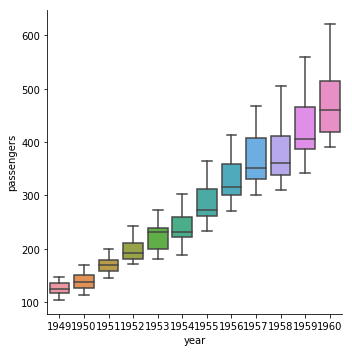

In [92]:
sns.catplot(x='year',y='passengers', data=flights, kind='box');

### Plot month & passengers

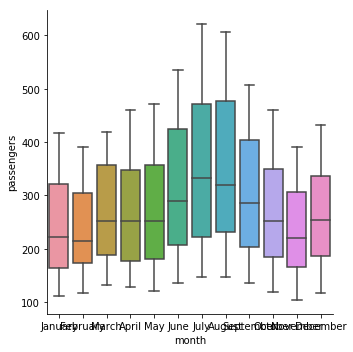

In [93]:
sns.catplot(x='month',y='passengers', data=flights, kind='box');

### Create a [pivot table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) of passengers by month and year

### Plot the pivot table as a [heat map](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

# ASSIGNMENT

### 1.

Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

### 2.

Choose a chart you want to make, from [FT's Visual Vocabulary poster](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!


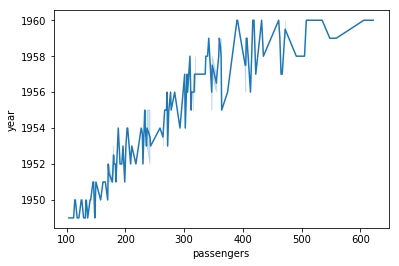

In [95]:
#Vertical Timeline

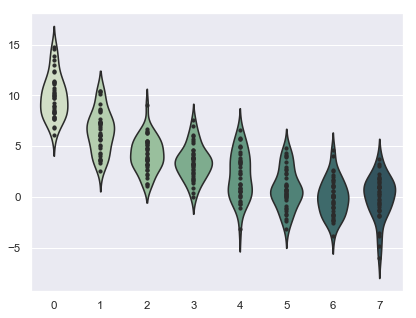

In [115]:
#Violin plot
#boc plot but more more effective with complex distributions
#(data that cannot be averaged)
#plot from http://seaborn.pydata.org/examples/simple_violinplots.html
from PIL import Image
import requests
from io import BytesIO
url= 'http://seaborn.pydata.org/_images/simple_violinplots.png'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
img

In [0]:
#copied data - random dataset and palette
rs = np.random.RandomState(0)
n,p = 40,8
d = rs.normal(0,2,(n,p))
d += np.log(np.arange(1, p+1))*-5+10

green = sns.cubehelix_palette(p, rot=-.5, dark=.3)

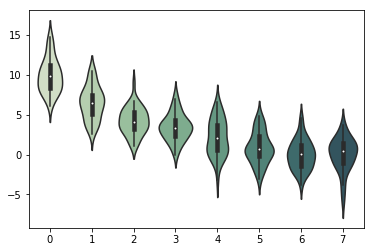

In [121]:
#minimum plot
sns.violinplot(data=d, palette=green)

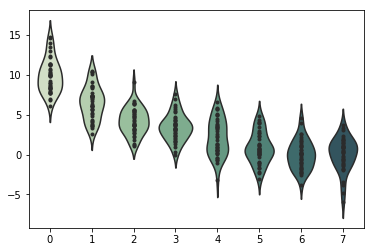

In [122]:
#the exact example
#inner defaults to "box"; change to represent data points
sns.violinplot(data=d, palette=green, inner='points')

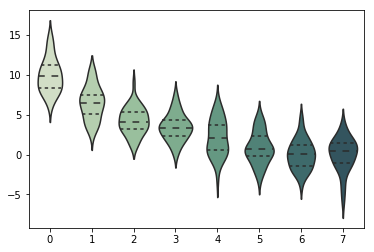

In [126]:
#inner = quartile
sns.violinplot(data=d, palette=green, inner='quartile')

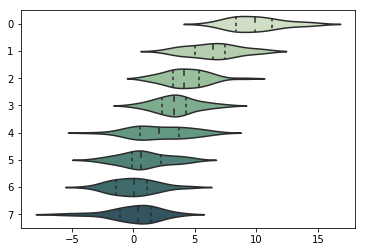

In [133]:
#Orientation defaults to v; change to h
sns.violinplot(data=d, palette=green, inner='quartile', orient='h')

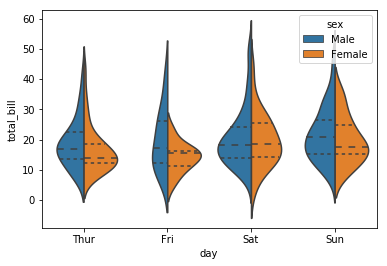

In [127]:
#new dataset that can be seperated into binary 'hues'
tips = sns.load_dataset('tips')
sns.violinplot('day', 'total_bill', data=tips, split=True, hue='sex', inner='quartile')


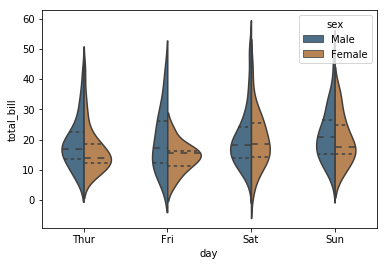

In [132]:
#scale_hue defaults to true, computing across group
#scale_hue = False computes across all violins and variation looks smaller
#changing saturation while we're at it
sns.violinplot('day', 'total_bill', data=tips, split=True, hue='sex', scale_hue=False, inner='quartile', saturation=0.4)

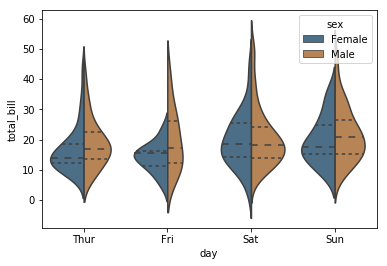

In [141]:
#change hue order (case sensitive)
sns.violinplot('day', 'total_bill', data=tips, split=True, hue='sex', hue_order=['Female', 'Male'], inner='quartile', saturation=0.4)